In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("muted")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Benign Data

In [61]:
# open a capture with the normal data from a scenario
data = pd.read_pickle('Datasets/IOT23/Malware-Capture-43-1/zeek_normal.pkl')

## The structure of the dataset

In [62]:
data.head()

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,label,detailed_label,protocol_num,state_num
0,2019-01-10 18:22:53.721088886,192.168.1.198,123,46.28.109.26,123,udp,0.005991,SF,0,1,76,1,76,Benign,missing,0,2
1,2019-01-10 18:22:54.721012115,192.168.1.198,123,37.187.104.44,123,udp,6.997284,S0,0,1,76,0,0,Benign,missing,0,0
2,2019-01-10 18:22:56.726622105,192.168.1.198,36616,192.168.1.1,53,udp,0.039224,SF,0,1,67,1,131,Benign,missing,0,2
3,2019-01-10 18:22:56.766344070,192.168.1.198,56258,192.168.1.1,53,udp,0.000500,SF,0,1,67,1,67,Benign,missing,0,2
4,2019-01-10 18:22:56.767592907,192.168.1.198,123,89.221.214.130,123,udp,54.999976,S0,0,1,76,0,0,Benign,missing,0,0


## Some basic statistics

In [63]:
data.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,2.057493e+07,2.057493e+07,2.057493e+07,20574934.0,2.057493e+07,2.057493e+07,2.057493e+07,2.057493e+07,2.057493e+07,2.057493e+07
mean,3.491309e+04,2.359650e+01,4.977392e-04,0.0,1.000011e+00,4.000223e+01,2.133664e-04,1.131795e-02,9.999997e-01,3.730753e-04
std,1.514095e+04,1.767746e+02,2.600989e-01,0.0,5.693677e-03,6.196546e-01,1.984677e-01,1.052127e+01,7.047843e-03,6.258638e-02
min,3.000000e+00,0.000000e+00,1.000000e-05,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.410400e+04,2.300000e+01,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,3.275100e+04,2.300000e+01,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,5.245800e+04,2.300000e+01,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,6.099800e+04,5.286900e+04,2.961058e+02,0.0,1.100000e+01,1.885000e+03,2.670000e+02,1.415100e+04,2.000000e+00,1.200000e+01


## Destination port distribution

Text(0, 0.5, 'Number of flows')

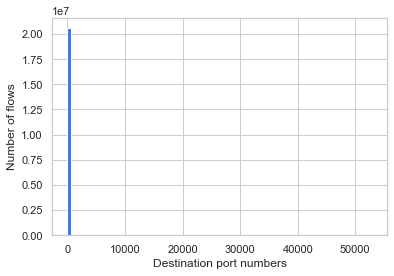

In [64]:
data['dst_port'].hist(bins=75)
plt.xlabel('Destination port numbers')
plt.ylabel('Number of flows')

## Protocol distribution

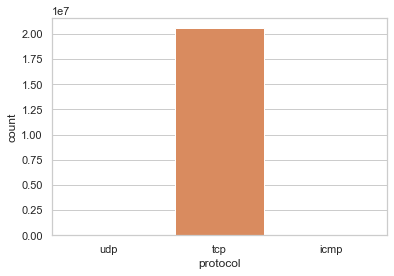

In [65]:
sns.countplot(x="protocol", data=data)

## Bytes Distribution

Text(0, 0.5, 'Number of bytes')

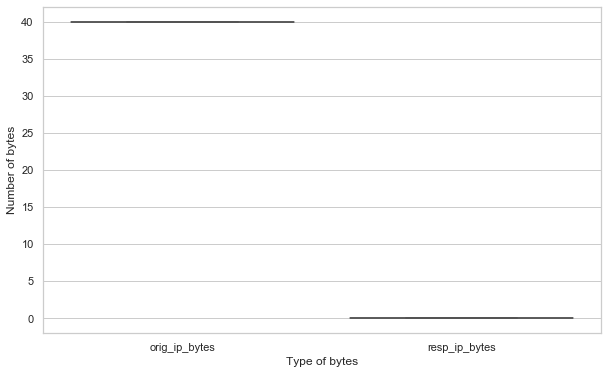

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(data[['orig_ip_bytes', 'resp_ip_bytes']]), showfliers=False)
plt.xlabel('Type of bytes')
plt.ylabel('Number of bytes')

## Number of hosts in the dataset

In [67]:
data['src_ip'].nunique()

501

## Flows per host

In [68]:
flows_per_host = data.groupby('src_ip').size().reset_index().rename(columns={0: 'num_flows'})
flows_per_host

,src_ip,num_flows
0,102.140.64.14,1
1,103.13.65.105,1
2,103.225.206.66,1
3,103.248.15.34,1
4,103.38.13.154,1
...,...,...
496,95.67.15.35,1
497,95.91.129.132,1
498,96.108.119.82,1
499,96.244.2.114,28


Text(0, 0.5, 'Number of hosts')

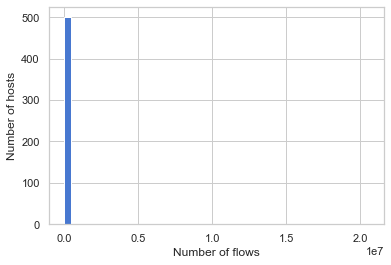

In [69]:
flows_per_host['num_flows'].hist(bins=50)
plt.xlabel('Number of flows')
plt.ylabel('Number of hosts')

Text(0, 0.5, 'Number of hosts with at least 100 flows')

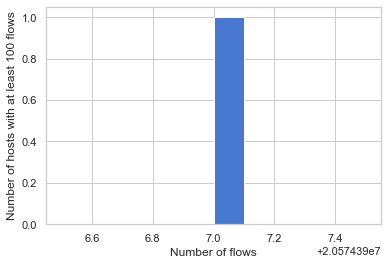

In [70]:
flows_per_host[flows_per_host['num_flows'] > 100]['num_flows'].hist(bins=10)
plt.xlabel('Number of flows')
plt.ylabel('Number of hosts with at least 100 flows')

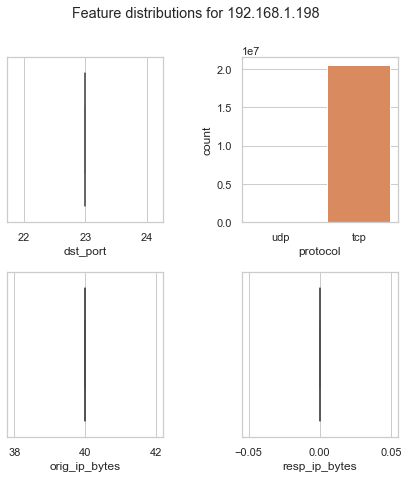

In [71]:
main_hosts = flows_per_host[flows_per_host['num_flows'] > 100]
for index, row in main_hosts.iterrows():
    host_data = data[data['src_ip'] == row['src_ip']]
    f, axes = plt.subplots(2, 2, figsize=(7, 7))
    f.suptitle('Feature distributions for ' + row['src_ip'])
    sns.boxplot(x=host_data['dst_port'], showfliers=False, color="y", ax=axes[0,0])
    sns.countplot(x=host_data['protocol'], ax=axes[0,1])
    sns.boxplot(x=host_data['orig_ip_bytes'], showfliers=False, color="b", ax=axes[1,0])
    sns.boxplot(x=host_data['resp_ip_bytes'], showfliers=False, color="r", ax=axes[1,1])
    plt.subplots_adjust(hspace=0.3, wspace=0.5)

## Number of connections in the dataset

In [72]:
flows_per_connection = data.groupby(['src_ip', 'dst_ip']).size().reset_index().rename(columns={0: 'num_flows'})
flows_per_connection.shape[0]

20512323

## Flows per connection

In [73]:
flows_per_connection

,src_ip,dst_ip,num_flows
0,102.140.64.14,192.168.1.198,1
1,103.13.65.105,192.168.1.198,1
2,103.225.206.66,192.168.1.198,1
3,103.248.15.34,192.168.1.198,1
4,103.38.13.154,192.168.1.198,1
...,...,...,...
20512318,95.67.15.35,192.168.1.198,1
20512319,95.91.129.132,192.168.1.198,1
20512320,96.108.119.82,192.168.1.198,1
20512321,96.244.2.114,192.168.1.198,28


Text(0, 0.5, 'Number of connections')

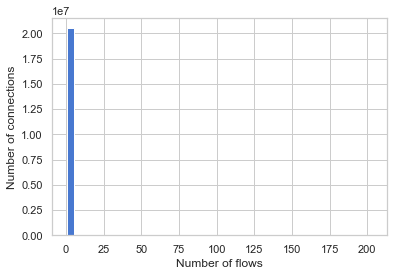

In [74]:
flows_per_connection['num_flows'].hist(bins=50)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections')

## Statistics for long connections

Text(0, 0.5, 'Number of connections with at least 100 flows')

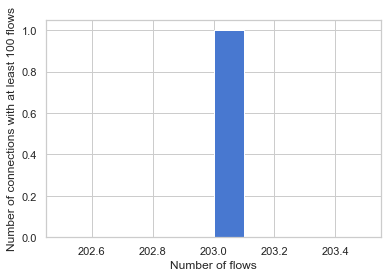

In [75]:
large_connections = flows_per_connection[flows_per_connection['num_flows'] > 100]
large_connections['num_flows'].hist(bins=10)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections with at least 100 flows')

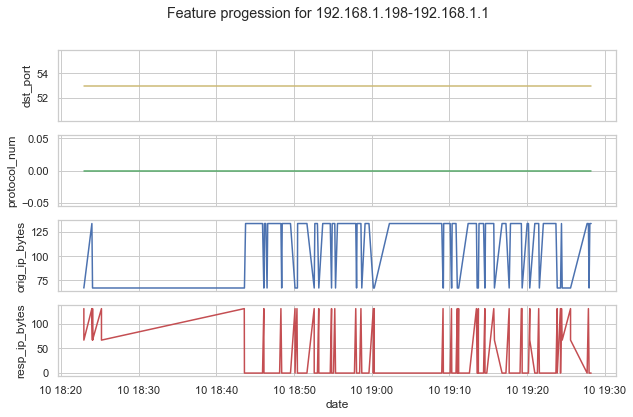

In [76]:
for index, row in large_connections.iterrows():
    f, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
    f.suptitle('Feature progession for ' + row['src_ip'] + '-' + row['dst_ip'])
    conn_data = data.loc[(data['src_ip'] == row['src_ip']) & (data['dst_ip'] == row['dst_ip'])].sort_values(by='date').reset_index(drop=True)
    sns.lineplot(x='date', y='dst_port', data=conn_data, color="y", ax=axes[0])
    sns.lineplot(x='date', y='protocol_num', data=conn_data, color="g", ax=axes[1])
    sns.lineplot(x='date', y='orig_ip_bytes', data=conn_data, color="b", ax=axes[2])
    sns.lineplot(x='date', y='resp_ip_bytes', data=conn_data, color="r", ax=axes[3])

## Statistics for short connections

Text(0, 0.5, 'Number of connections with less than 100 flows')

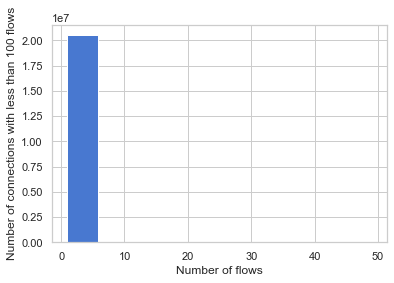

In [77]:
small_connections = flows_per_connection[flows_per_connection['num_flows'] <= 100]
small_connections['num_flows'].hist(bins=10)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections with less than 100 flows')

In [78]:
small_data = data
for index, row in large_connections.iterrows():
    small_data = small_data.loc[~((small_data['src_ip'] == row['src_ip']) & (small_data['dst_ip'] == row['dst_ip']))]
small_data = small_data.sort_values(by='date').reset_index(drop=True)
small_data.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,2.057473e+07,2.057473e+07,2.057473e+07,20574731.0,2.057473e+07,2.057473e+07,2.057473e+07,2.057473e+07,2.057473e+07,2.057473e+07
mean,3.491296e+04,2.359621e+01,4.558223e-04,0.0,1.000005e+00,4.000151e+01,2.111328e-04,1.105050e-02,1.000010e+00,3.686075e-04
std,1.514095e+04,1.767754e+02,2.596973e-01,0.0,5.065819e-03,5.674644e-01,1.984631e-01,1.051974e+01,6.309201e-03,6.251523e-02
min,3.000000e+00,0.000000e+00,1.000000e-05,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.410400e+04,2.300000e+01,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,3.275100e+04,2.300000e+01,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,5.245800e+04,2.300000e+01,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,5.528800e+04,5.286900e+04,2.961058e+02,0.0,1.100000e+01,1.885000e+03,2.670000e+02,1.415100e+04,2.000000e+00,1.200000e+01


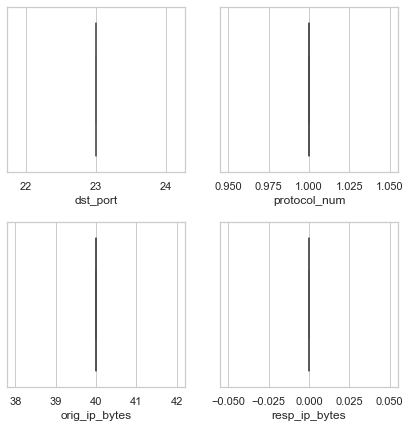

In [79]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.boxplot(x=small_data['dst_port'], showfliers=False, color="y", ax=axes[0,0])
sns.boxplot(x=small_data['protocol_num'], showfliers=False, color="g", ax=axes[0,1])
sns.boxplot(x=small_data['orig_ip_bytes'], showfliers=False, color="b", ax=axes[1,0])
sns.boxplot(x=small_data['resp_ip_bytes'], showfliers=False, color="r", ax=axes[1,1])
plt.subplots_adjust(hspace=0.3)

## Statistics destination ports on short connections 

In [80]:
flows_per_port = small_data.groupby(['src_ip', 'dst_port']).size().reset_index().rename(columns={0: 'num_flows'})
flows_per_port.shape[0]

521

Text(0, 0.5, 'Number of source ip - destination port pair')

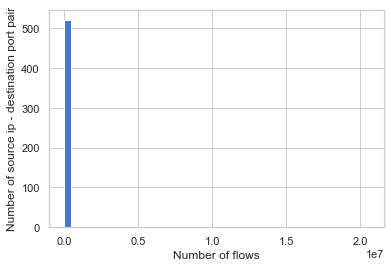

In [81]:
flows_per_port['num_flows'].hist(bins=50)
plt.xlabel('Number of flows')
plt.ylabel('Number of source ip - destination port pair')

## Maximum number of flows in one destination port from a specific source IP

In [82]:
flows_per_port['num_flows'].max()

20573682

## The destination port with the maximum traffic received

In [83]:
flows_per_port.iloc[flows_per_port['num_flows'].argmax()]['dst_port']

23

# Malicious Data

In [85]:
# open a capture with the malicious data from a scenario
anomalous_data = pd.read_pickle('Datasets/IOT23/Malware-Capture-43-1/zeek_anomalous.pkl')

## The structure of the dataset

In [86]:
anomalous_data.head()

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,label,detailed_label,protocol_num,state_num
0,2019-01-10 18:22:55.322918892,192.168.1.1,52318,192.168.1.198,22,tcp,368.758327,SF,0,1301,68616,1462,200216,Malicious,FileDownload,1,2
1,2019-01-10 18:22:55.529057980,192.168.1.198,36934,142.11.219.83,80,tcp,3.101729,S0,0,3,180,0,0,Malicious,C&C,1,0
2,2019-01-10 18:23:02.710714102,192.168.1.198,36934,142.11.219.83,80,tcp,3.128466,S0,0,1,60,0,0,Malicious,C&C,1,0
3,2019-01-10 18:23:11.350775957,192.168.1.198,36934,142.11.219.83,80,tcp,3.128466,S0,0,1,60,0,0,Malicious,C&C,1,0
4,2019-01-10 18:23:27.990777016,192.168.1.198,36934,142.11.219.83,80,tcp,0.761313,SF,4344,41,2381,40,56393,Malicious,C&C-FileDownload,1,2


## Some basic statistics

In [87]:
anomalous_data.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,4.674688e+07,4.674688e+07,4.674688e+07,4.674688e+07,4.674688e+07,4.674688e+07,4.674688e+07,4.674688e+07,4.674688e+07,4.674688e+07
mean,3.401689e+04,4.989323e+04,4.129434e-01,2.075347e-03,1.316231e+00,5.678013e+01,7.506384e-05,2.940487e-02,9.985924e-01,8.235845e-06
std,1.673989e+04,6.184357e+03,1.103296e+01,4.596240e+00,8.474200e+00,4.496184e+02,2.185536e-01,5.418860e+01,3.749218e-02,5.030550e-03
min,0.000000e+00,2.200000e+01,3.000000e-06,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.256800e+04,5.286900e+04,1.000000e-05,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,3.249500e+04,5.286900e+04,1.000000e-05,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,5.122000e+04,5.286900e+04,1.000000e-05,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,6.553500e+04,5.286900e+04,2.327121e+03,1.592800e+04,1.301000e+03,6.861600e+04,1.462000e+03,2.002160e+05,1.000000e+00,6.000000e+00


## Split data according to attack scenario

## Horizontal Port Scan 

In [88]:
port_scan = anomalous_data[anomalous_data['detailed_label'] == 'PartOfAHorizontalPortScan']
port_scan.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,3.791167e+07,37911674.0,3.791167e+07,37911674.0,3.791167e+07,3.791167e+07,37911674.0,37911674.0,37911674.0,37911674.0
mean,3.354098e+04,52869.0,2.660217e-04,0.0,1.000064e+00,4.000256e+01,0.0,0.0,1.0,0.0
std,1.702937e+04,0.0,2.831480e-02,0.0,8.013999e-03,3.261395e-01,0.0,0.0,0.0,0.0
min,1.220000e+03,52869.0,3.000000e-06,0.0,1.000000e+00,4.000000e+01,0.0,0.0,1.0,0.0
25%,2.256800e+04,52869.0,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.0,0.0,1.0,0.0
50%,3.223900e+04,52869.0,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.0,0.0,1.0,0.0
75%,5.122000e+04,52869.0,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.0,0.0,1.0,0.0
max,5.904200e+04,52869.0,4.698639e+00,0.0,3.000000e+00,1.800000e+02,0.0,0.0,1.0,0.0


## Destination port distribution

Text(0, 0.5, 'Number of flows')

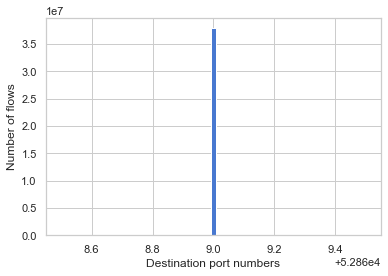

In [89]:
port_scan['dst_port'].hist(bins=75)
plt.xlabel('Destination port numbers')
plt.ylabel('Number of flows')

## Protocol Distribution

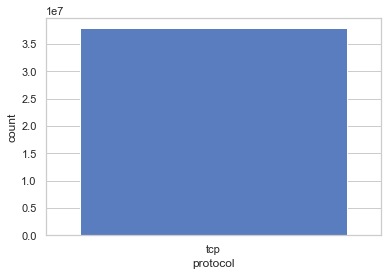

In [90]:
sns.countplot(x="protocol", data=port_scan)

## Bytes distribution

Text(0, 0.5, 'Number of bytes')

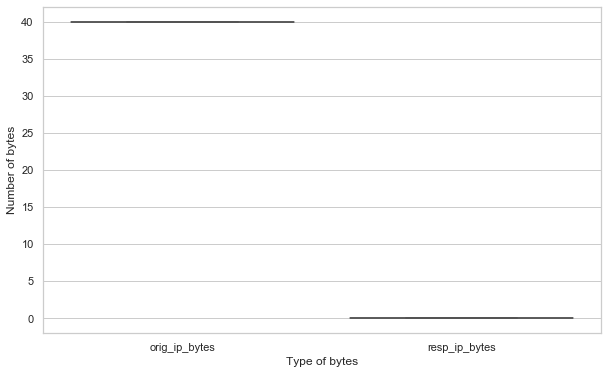

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(port_scan[['orig_ip_bytes', 'resp_ip_bytes']]), showfliers=False)
plt.xlabel('Type of bytes')
plt.ylabel('Number of bytes')

## Number of hosts in the dataset

In [92]:
port_scan['src_ip'].nunique()

1

## Number of connections in the dataset

In [93]:
flows_per_connection_ps = port_scan.groupby(['src_ip', 'dst_ip']).size().reset_index().rename(columns={0: 'num_flows'})
flows_per_connection_ps.shape[0]

26633000

## Flows per connections

In [94]:
flows_per_connection_ps

,src_ip,dst_ip,num_flows
0,192.168.1.198,185.0.0.0,1
1,192.168.1.198,185.0.0.10,1
2,192.168.1.198,185.0.0.100,2
3,192.168.1.198,185.0.0.101,2
4,192.168.1.198,185.0.0.103,2
...,...,...,...
26632995,192.168.1.198,91.99.99.90,2
26632996,192.168.1.198,91.99.99.94,1
26632997,192.168.1.198,91.99.99.95,2
26632998,192.168.1.198,91.99.99.97,1


Text(0, 0.5, 'Number of connections')

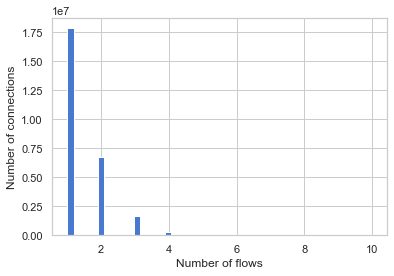

In [95]:
flows_per_connection_ps['num_flows'].hist(bins=50)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections')

## Statistics for long connections

Text(0, 0.5, 'Number of connections with at least 100 flows')

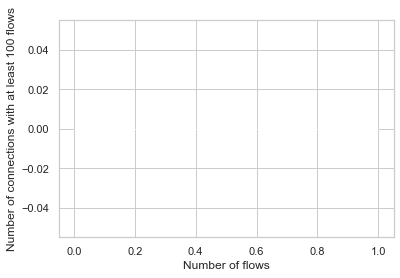

In [96]:
large_connections_ps = flows_per_connection_ps[flows_per_connection_ps['num_flows'] > 100]
large_connections_ps['num_flows'].hist(bins=10)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections with at least 100 flows')

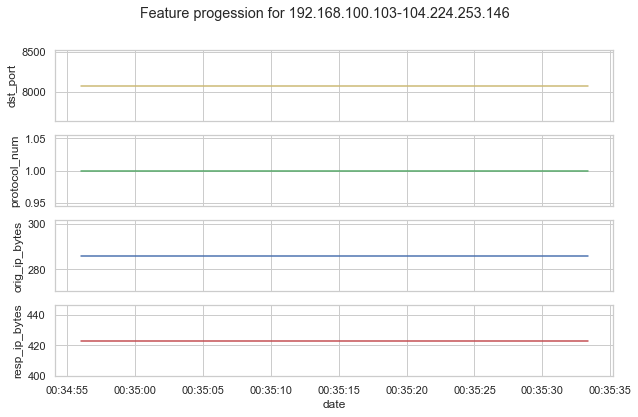

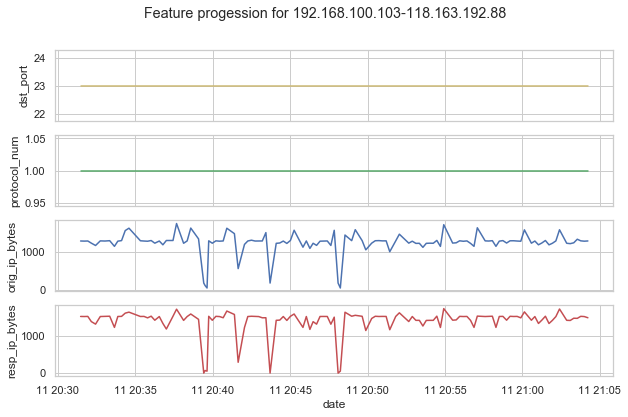

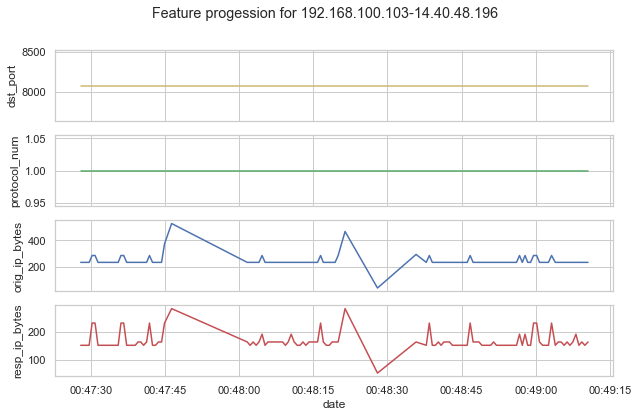

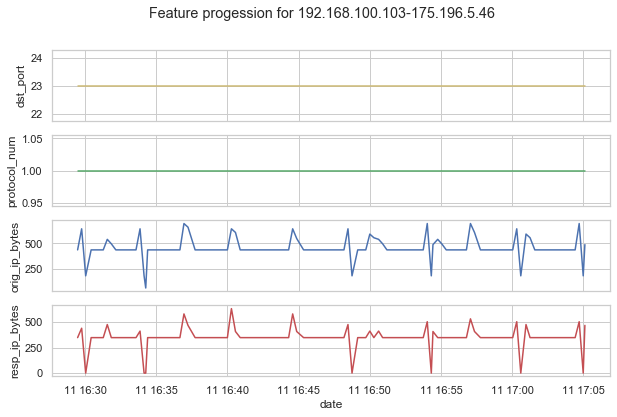

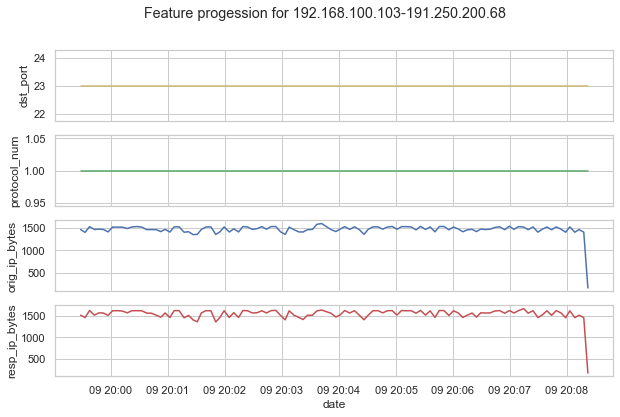

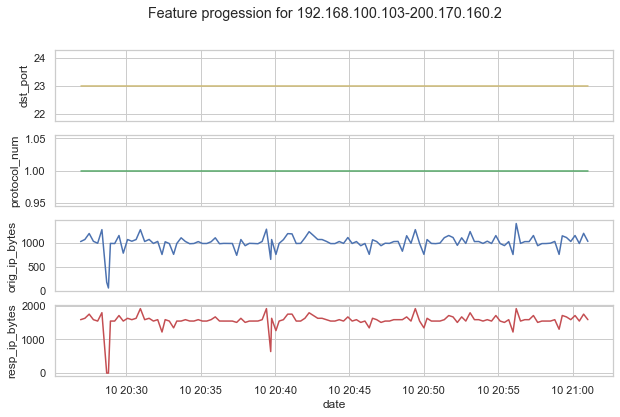

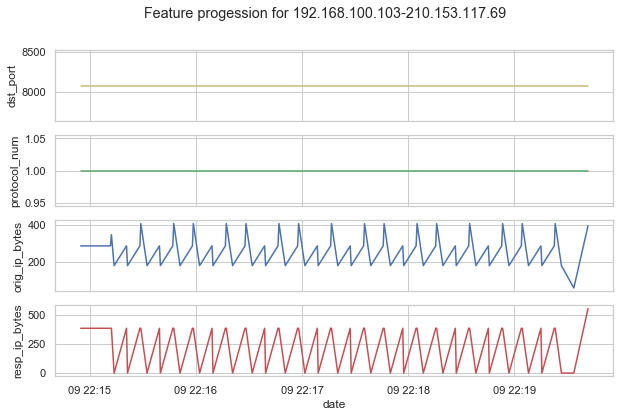

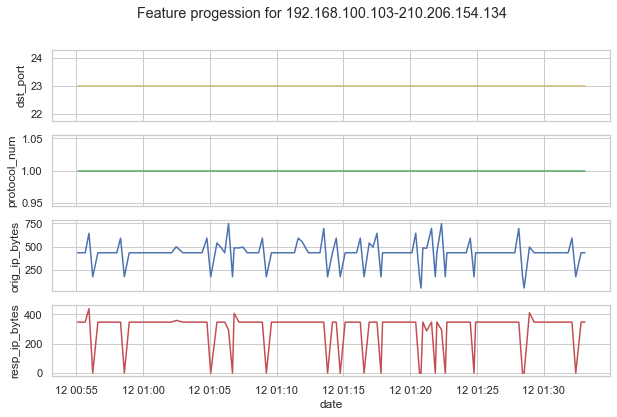

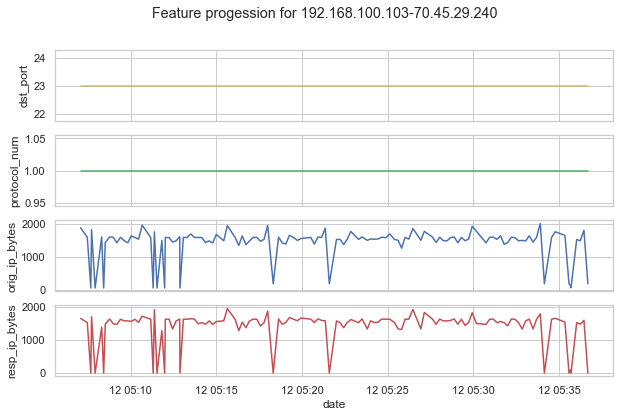

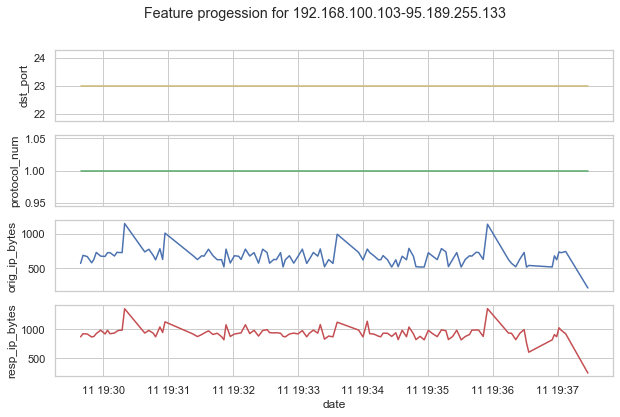

In [52]:
seen = {}
for index, row in large_connections_ps.iterrows():
    if row['num_flows'] not in seen.keys():
        f, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
        f.suptitle('Feature progession for ' + row['src_ip'] + '-' + row['dst_ip'])
        conn_data = port_scan.loc[(port_scan['src_ip'] == row['src_ip']) & (port_scan['dst_ip'] == row['dst_ip'])].sort_values(by='date').reset_index(drop=True)
        sns.lineplot(x='date', y='dst_port', data=conn_data, color="y", ax=axes[0])
        sns.lineplot(x='date', y='protocol_num', data=conn_data, color="g", ax=axes[1])
        sns.lineplot(x='date', y='orig_ip_bytes', data=conn_data, color="b", ax=axes[2])
        sns.lineplot(x='date', y='resp_ip_bytes', data=conn_data, color="r", ax=axes[3])
        seen[row['num_flows']] = 1

## Statistics for short connections

Text(0, 0.5, 'Number of connections with less than 100 flows')

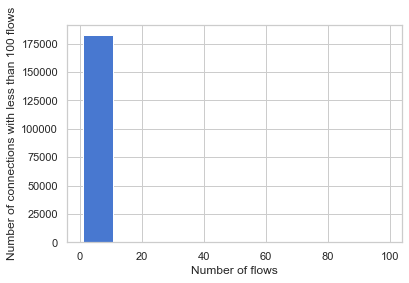

In [53]:
small_connections_ps = flows_per_connection_ps[flows_per_connection_ps['num_flows'] <= 100]
small_connections_ps['num_flows'].hist(bins=10)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections with less than 100 flows')

In [54]:
small_data_ps = port_scan
for index, row in large_connections_ps.iterrows():
    small_data_ps = small_data_ps.loc[~((small_data_ps['src_ip'] == row['src_ip']) & (small_data_ps['dst_ip'] == row['dst_ip']))]
small_data_ps = small_data_ps.sort_values(by='date').reset_index(drop=True)
small_data_ps.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,531242.000000,531242.000000,531242.000000,531242.0,531242.000000,531242.00000,531242.000000,531242.000000,531242.000000,531242.000000
mean,46889.663788,3202.660176,2.988355,0.0,1.682363,100.81076,0.024262,1.568598,0.999951,0.027865
std,8159.061739,3803.176800,1.383507,0.0,1.152529,66.63337,0.645724,50.781070,0.006996,0.312920
min,32768.000000,23.000000,0.000010,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,39836.000000,23.000000,2.998761,0.0,1.000000,60.00000,0.000000,0.000000,1.000000,0.000000
50%,46902.000000,23.000000,2.998799,0.0,1.000000,60.00000,0.000000,0.000000,1.000000,0.000000
75%,53969.000000,8080.000000,2.999042,0.0,3.000000,180.00000,0.000000,0.000000,1.000000,0.000000
max,61000.000000,9527.000000,238.388308,0.0,52.000000,2901.00000,43.000000,9415.000000,1.000000,10.000000


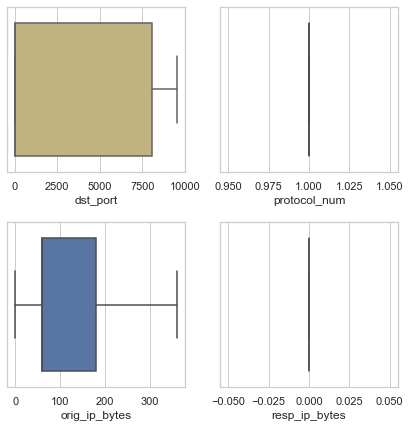

In [55]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.boxplot(x=small_data_ps['dst_port'], showfliers=False, color="y", ax=axes[0,0])
sns.boxplot(x=small_data_ps['protocol_num'], showfliers=False, color="g", ax=axes[0,1])
sns.boxplot(x=small_data_ps['orig_ip_bytes'], showfliers=False, color="b", ax=axes[1,0])
sns.boxplot(x=small_data_ps['resp_ip_bytes'], showfliers=False, color="r", ax=axes[1,1])
plt.subplots_adjust(hspace=0.3)

## Statistics destination ports on short connections

In [56]:
flows_per_port_ps = small_data_ps.groupby(['src_ip', 'dst_port']).size().reset_index().rename(columns={0: 'num_flows'})
flows_per_port_ps.shape[0]

4

Text(0, 0.5, 'Number of source ip - destination port pair')

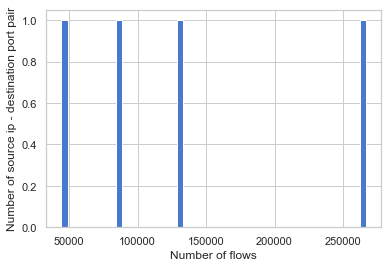

In [57]:
flows_per_port_ps['num_flows'].hist(bins=50)
plt.xlabel('Number of flows')
plt.ylabel('Number of source ip - destination port pair')

## Maximum number of flows from a specific source IP to a specific destination port

In [58]:
flows_per_port_ps['num_flows'].max()

266715

## Destination port with the most incoming traffic

In [59]:
flows_per_port_ps.iloc[flows_per_port_ps['num_flows'].argmax()]['dst_port']

23

## C&C

In [97]:
cc = anomalous_data[anomalous_data['detailed_label'] == 'C&C']
cc.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,3498.000000,3498.000000,3498.000000,3498.0,3498.000000,3498.000000,3498.000000,3498.000000,3498.0,3498.000000
mean,50666.814751,45.340194,13.342911,0.0,2.693539,158.285020,0.347055,20.332762,1.0,0.041452
std,1700.781974,3.434304,115.894364,0.0,7.369598,407.094167,3.722758,208.403399,0.0,0.351877
min,36934.000000,45.000000,0.300318,0.0,1.000000,60.000000,0.000000,0.000000,1.0,0.000000
25%,49886.000000,45.000000,3.127715,0.0,1.000000,60.000000,0.000000,0.000000,1.0,0.000000
50%,50784.000000,45.000000,3.128466,0.0,3.000000,180.000000,0.000000,0.000000,1.0,0.000000
75%,51682.000000,45.000000,3.128975,0.0,3.000000,180.000000,0.000000,0.000000,1.0,0.000000
max,52594.000000,80.000000,2327.120922,0.0,170.000000,9458.000000,96.000000,5116.000000,1.0,6.000000


## Destination port distribution

Text(0, 0.5, 'Number of flows')

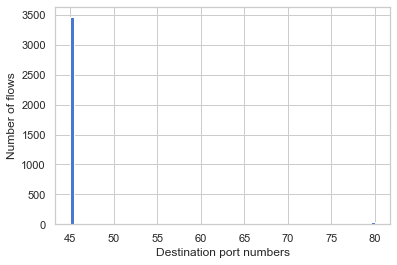

In [98]:
cc['dst_port'].hist(bins=75)
plt.xlabel('Destination port numbers')
plt.ylabel('Number of flows')

## Protocol distribution

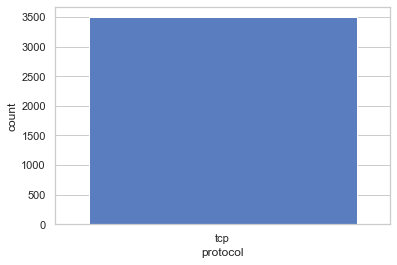

In [99]:
sns.countplot(x="protocol", data=cc)

## Bytes distribution

Text(0, 0.5, 'Number of bytes')

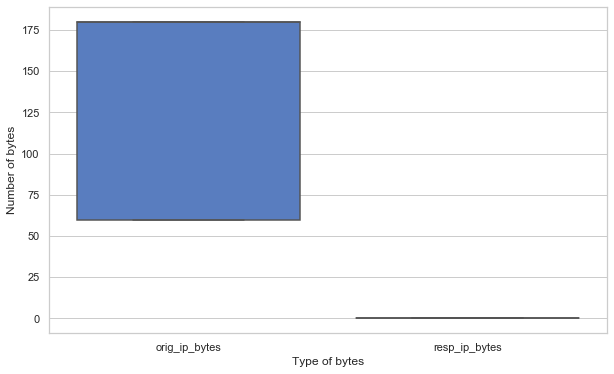

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(cc[['orig_ip_bytes', 'resp_ip_bytes']]), showfliers=False)
plt.xlabel('Type of bytes')
plt.ylabel('Number of bytes')

## Number of hosts in the dataset

In [102]:
cc['src_ip'].nunique()

1

## Number of connections in the dataset

In [103]:
flows_per_connection_cc = cc.groupby(['src_ip', 'dst_ip']).size().reset_index().rename(columns={0: 'num_flows'})
flows_per_connection_cc.shape[0]

1

In [104]:
flows_per_connection_cc

,src_ip,dst_ip,num_flows
0,192.168.1.198,142.11.219.83,3498


Text(0, 0.5, 'Number of connections')

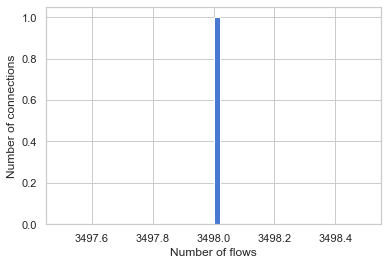

In [106]:
flows_per_connection_cc['num_flows'].hist(bins=50)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections')

## Statistics for long connections

Text(0, 0.5, 'Number of connections with at least 100 flows')

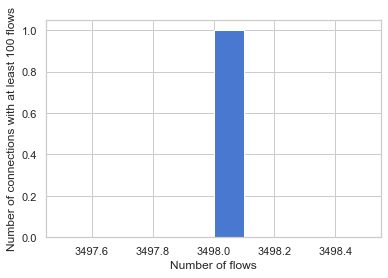

In [105]:
large_connections_cc = flows_per_connection_cc[flows_per_connection_cc['num_flows'] > 100]
large_connections_cc['num_flows'].hist(bins=10)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections with at least 100 flows')

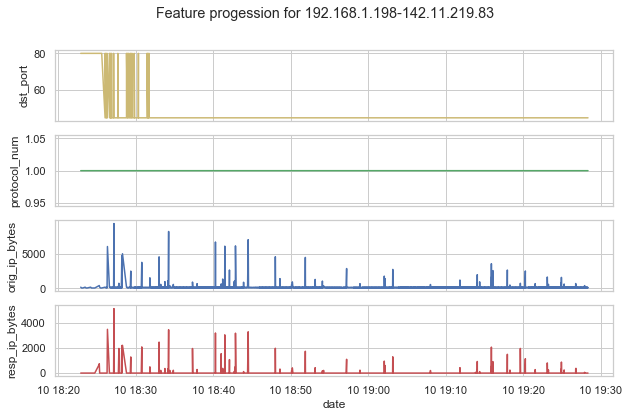

In [107]:
seen = {}
for index, row in large_connections_cc.iterrows():
    if row['num_flows'] not in seen.keys():
        f, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
        f.suptitle('Feature progession for ' + row['src_ip'] + '-' + row['dst_ip'])
        conn_data = cc.loc[(cc['src_ip'] == row['src_ip']) & (cc['dst_ip'] == row['dst_ip'])].sort_values(by='date').reset_index(drop=True)
        sns.lineplot(x='date', y='dst_port', data=conn_data, color="y", ax=axes[0])
        sns.lineplot(x='date', y='protocol_num', data=conn_data, color="g", ax=axes[1])
        sns.lineplot(x='date', y='orig_ip_bytes', data=conn_data, color="b", ax=axes[2])
        sns.lineplot(x='date', y='resp_ip_bytes', data=conn_data, color="r", ax=axes[3])
        seen[row['num_flows']] = 1

## DDoS

In [108]:
ddos = anomalous_data[anomalous_data['detailed_label'] == 'DDoS']
ddos.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,65803.000000,65803.0,65803.000000,65803.0,65803.000000,65803.000000,65803.0,65803.0,65803.0,65803.0
mean,32773.761804,27015.0,292.481422,0.0,225.492105,11951.081577,0.0,0.0,0.0,0.0
std,18916.196041,0.0,18.027362,0.0,25.702395,1362.226949,0.0,0.0,0.0,0.0
min,0.000000,27015.0,32.055691,0.0,11.000000,583.000000,0.0,0.0,0.0,0.0
25%,16396.500000,27015.0,293.189826,0.0,211.000000,11183.000000,0.0,0.0,0.0,0.0
50%,32773.000000,27015.0,294.491673,0.0,226.000000,11978.000000,0.0,0.0,0.0,0.0
75%,49159.500000,27015.0,295.360193,0.0,241.000000,12773.000000,0.0,0.0,0.0,0.0
max,65535.000000,27015.0,296.465382,0.0,328.000000,17384.000000,0.0,0.0,0.0,0.0


## Destination port distribution

Text(0, 0.5, 'Number of flows')

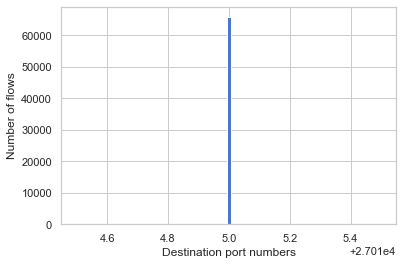

In [109]:
ddos['dst_port'].hist(bins=75)
plt.xlabel('Destination port numbers')
plt.ylabel('Number of flows')

## Protocol distribution

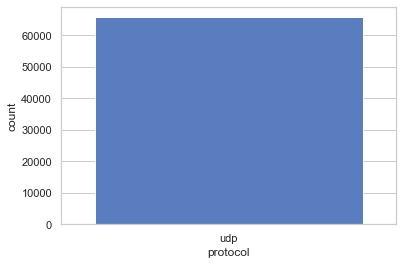

In [110]:
sns.countplot(x="protocol", data=ddos)

## Bytes distribution

Text(0, 0.5, 'Number of bytes')

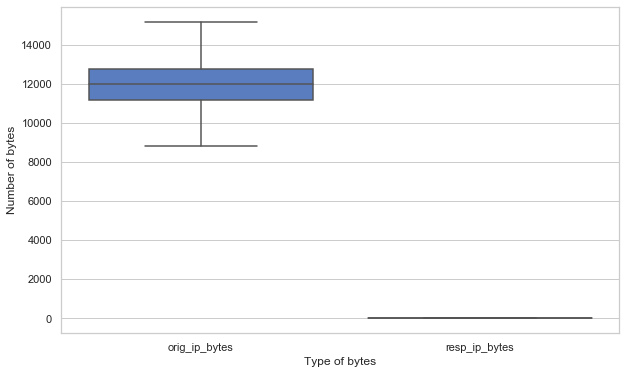

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(ddos[['orig_ip_bytes', 'resp_ip_bytes']]), showfliers=False)
plt.xlabel('Type of bytes')
plt.ylabel('Number of bytes')

## Number of hosts in the dataset

In [112]:
ddos['src_ip'].nunique()

1

## Number of connections in the dataset

In [113]:
flows_per_connection_ddos = ddos.groupby(['src_ip', 'dst_ip']).size().reset_index().rename(columns={0: 'num_flows'})
flows_per_connection_ddos.shape[0]

1

In [114]:
flows_per_connection_ddos

,src_ip,dst_ip,num_flows
0,192.168.1.198,96.244.2.114,65803


## Statistics for long connections

Text(0, 0.5, 'Number of connections with at least 100 flows')

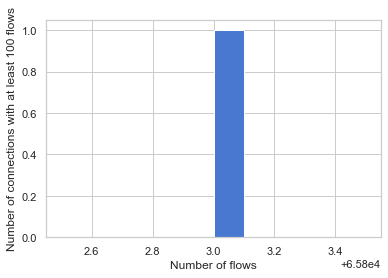

In [115]:
large_connections_ddos = flows_per_connection_ddos[flows_per_connection_ddos['num_flows'] > 100]
large_connections_ddos['num_flows'].hist(bins=10)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections with at least 100 flows')

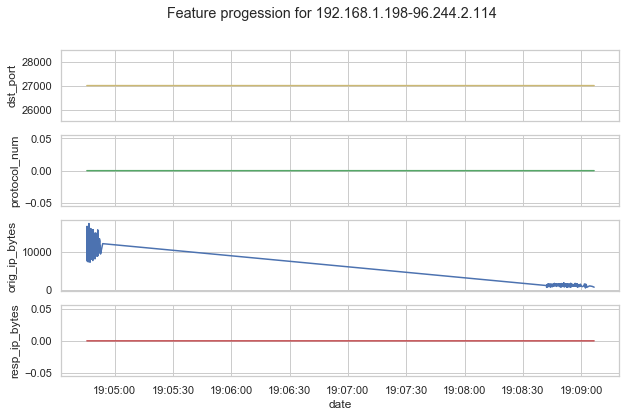

In [116]:
seen = {}
for index, row in large_connections_ddos.iterrows():
    if row['num_flows'] not in seen.keys():
        f, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
        f.suptitle('Feature progession for ' + row['src_ip'] + '-' + row['dst_ip'])
        conn_data = ddos.loc[(ddos['src_ip'] == row['src_ip']) & (ddos['dst_ip'] == row['dst_ip'])].sort_values(by='date').reset_index(drop=True)
        sns.lineplot(x='date', y='dst_port', data=conn_data, color="y", ax=axes[0])
        sns.lineplot(x='date', y='protocol_num', data=conn_data, color="g", ax=axes[1])
        sns.lineplot(x='date', y='orig_ip_bytes', data=conn_data, color="b", ax=axes[2])
        sns.lineplot(x='date', y='resp_ip_bytes', data=conn_data, color="r", ax=axes[3])
        seen[row['num_flows']] = 1

## C&C-FileDownload

In [117]:
cc_download = anomalous_data[anomalous_data['detailed_label'] == 'C&C-FileDownload']
cc_download.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,14.000000,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0
mean,36959.285714,80.0,2.187707,6929.714286,56.285714,3447.071429,54.642857,78607.857143,1.0,2.0
std,42.161646,0.0,1.436720,4924.463445,18.999711,1437.399975,19.004482,28445.793565,0.0,0.0
min,36934.000000,80.0,0.748302,0.000000,40.000000,2302.000000,38.000000,54837.000000,1.0,2.0
25%,36940.500000,80.0,0.961078,3258.000000,41.750000,2414.250000,40.000000,56953.000000,1.0,2.0
50%,36951.000000,80.0,1.864796,7240.000000,53.000000,3192.500000,52.500000,74116.000000,1.0,2.0
75%,36957.500000,80.0,2.901216,10136.000000,59.000000,3579.000000,57.750000,82657.000000,1.0,2.0
max,37102.000000,80.0,5.110081,15928.000000,98.000000,6734.000000,96.000000,140532.000000,1.0,2.0


## Okiru

In [118]:
okiru = anomalous_data[anomalous_data['detailed_label'] == 'Okiru']
okiru.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,8.765885e+06,8765885.0,8.765885e+06,8765885.0,8.765885e+06,8.765885e+06,8.765885e+06,8.765885e+06,8765885.0,8.765885e+06
mean,3.607783e+04,37215.0,5.682919e-05,0.0,1.000017e+00,4.000072e+01,7.757346e-06,3.121191e-04,1.0,2.395651e-05
std,1.523562e+04,0.0,1.139127e-02,0.0,4.298888e-03,1.886585e-01,2.825853e-03,1.140469e-01,0.0,8.833414e-03
min,1.157100e+04,37215.0,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.0,0.000000e+00
25%,2.436000e+04,37215.0,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.0,0.000000e+00
50%,3.249500e+04,37215.0,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.0,0.000000e+00
75%,5.324500e+04,37215.0,1.000000e-05,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.0,0.000000e+00
max,5.999600e+04,37215.0,4.640093e+00,0.0,3.000000e+00,1.800000e+02,2.000000e+00,8.800000e+01,1.0,6.000000e+00


## Destination port distribution

Text(0, 0.5, 'Number of flows')

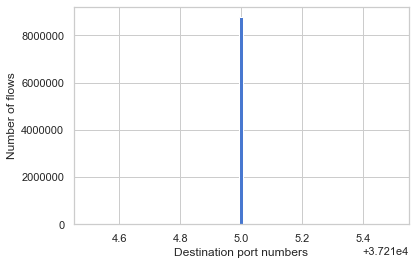

In [119]:
okiru['dst_port'].hist(bins=75)
plt.xlabel('Destination port numbers')
plt.ylabel('Number of flows')

## Protocol distribution

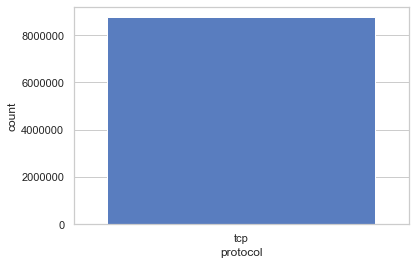

In [120]:
sns.countplot(x="protocol", data=okiru)

## Bytes distribution

Text(0, 0.5, 'Number of bytes')

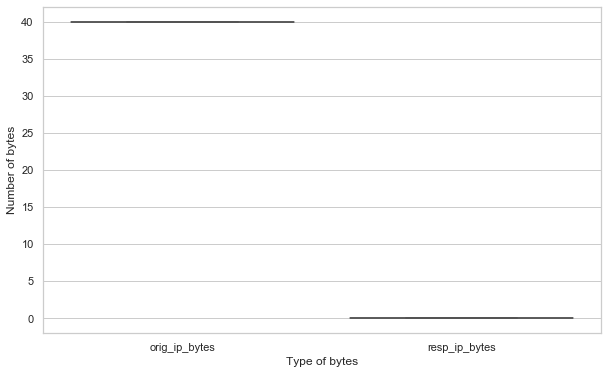

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(okiru[['orig_ip_bytes', 'resp_ip_bytes']]), showfliers=False)
plt.xlabel('Type of bytes')
plt.ylabel('Number of bytes')

## Number of hosts in the dataset

In [122]:
okiru['src_ip'].nunique()

1

## Number of connections in the dataset

In [123]:
flows_per_connection_okiru = okiru.groupby(['src_ip', 'dst_ip']).size().reset_index().rename(columns={0: 'num_flows'})
flows_per_connection_okiru.shape[0]

8044656

In [124]:
flows_per_connection_okiru

,src_ip,dst_ip,num_flows
0,192.168.1.198,156.0.0.103,1
1,192.168.1.198,156.0.0.106,1
2,192.168.1.198,156.0.0.108,1
3,192.168.1.198,156.0.0.111,1
4,192.168.1.198,156.0.0.118,1
...,...,...,...
8044651,192.168.1.198,41.99.99.86,1
8044652,192.168.1.198,41.99.99.89,1
8044653,192.168.1.198,41.99.99.91,1
8044654,192.168.1.198,41.99.99.92,1


## Statistics for long connections

Text(0, 0.5, 'Number of connections with at least 100 flows')

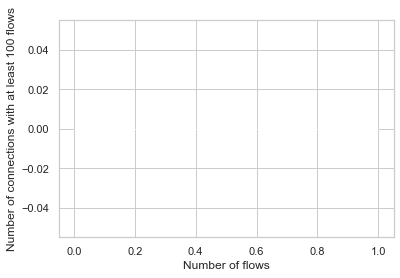

In [125]:
large_connections_okiru = flows_per_connection_okiru[flows_per_connection_okiru['num_flows'] > 100]
large_connections_okiru['num_flows'].hist(bins=10)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections with at least 100 flows')